# BANK REVIEW COMPLAINT ANALYSIS - Text Mining

<b>Central banks collecting information about customer satisfaction with the services provided by different bank. Also collects the information about the complaints.

<b>The objective of the case study is to analyze customer reviews and predict customer satisfaction with the reviews

<b>Import libraries

In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
from nltk.wsd import lesk
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
import nltk
import re
import string
nltk.download('punkt')
nltk.download('stopwords')

C:\Users\Aanchal\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aanchal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aanchal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<b>Load Dataset

In [2]:
# read excel into a DataFrame
data = pd.read_excel('BankReviews.xlsx')

In [3]:
data.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [4]:
data= data[['Reviews', 'Stars']]
data.head()

,Reviews,Stars
0,"Great job, Wyndham Capital! Each person was pr...",5
1,Matthew Richardson is professional and helpful...,5
2,We had a past experience with Wyndham Mortgage...,5
3,We have been dealing with Brad Thomka from the...,5
4,I can't express how grateful I am for the supp...,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 2 columns):
Reviews    505 non-null object
Stars      505 non-null int64
dtypes: int64(1), object(1)
memory usage: 8.0+ KB


<b>Basic Exploratory Analysis

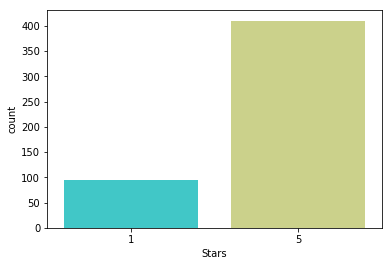

In [6]:
import seaborn as sns

sns.countplot(x='Stars',data=data,palette='rainbow')

<b>Bank data - Word cloud with all words

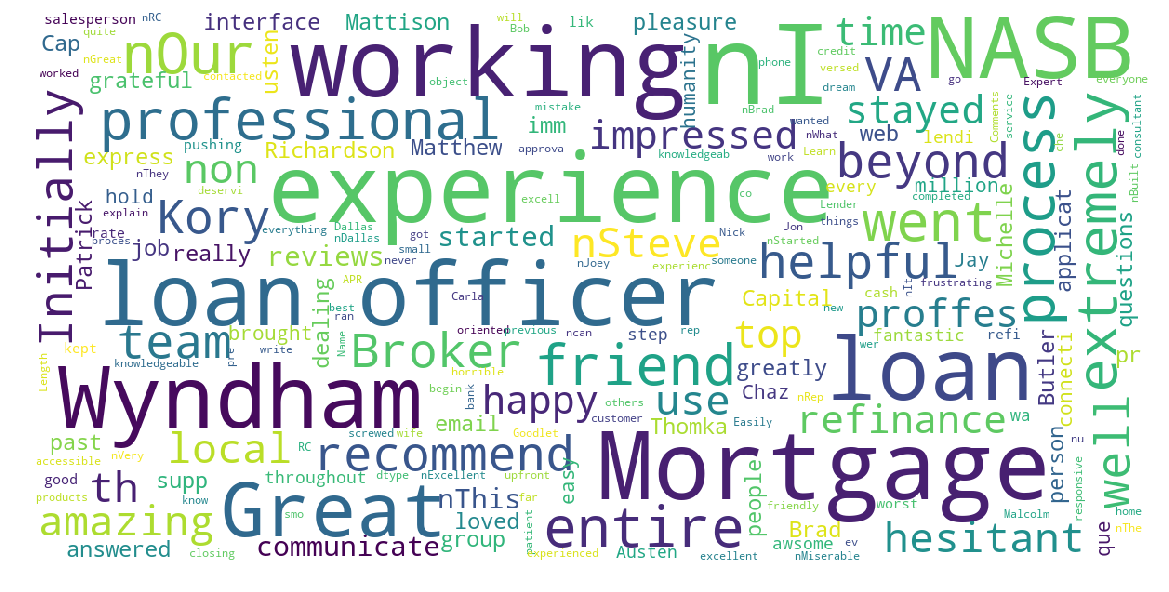

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(data["Reviews"])

In [8]:
#Generating New Festures
eng_stopword= set(stopwords.words('english'))
data['Reviews'] = data['Reviews'].astype(str)
data['count_sent'] = data['Reviews'].apply(lambda x: len(re.findall("\n",str(x)))+1)
#word count
data['count_word'] = data.Reviews.apply(lambda x : len(str(x).split()))
#Unique word count
data['count_unique_word'] = data.Reviews.apply(lambda x: len(set(str(x).split())))
#Letter count
data['count_letters'] = data.Reviews.apply(lambda x:len(str(x)))
#word density
data['word_density'] = data.count_letters / data.count_word+1
#punctuation count
data['count_punctuation'] = data.Reviews.apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#upper case word count
data['count_word_upper'] = data.Reviews.apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#lower case word count
data['count_word_lower'] = data.Reviews.apply(lambda x: len([w for w in str(x).split() if w.islower()]))
# title case words count
data['count_word_title'] = data.Reviews.apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
#number of stop words
data['count_stopwords'] = data.Reviews.apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopword]))
#Average length of words
data['mean_word_len'] =  data.Reviews.apply(lambda x: np.mean([len(w) for w in str(x).split()]))
#number of numeric
data['numeric'] = data.Reviews.apply(lambda x: len([x for x in x.split() if x.isdigit()]))
#number of alphanumeric
data['alphanumeric'] = data.Reviews.apply(lambda x: len([x for x in x.split() if x.isalnum()]))
#number of alphabetic
data['alphabetic'] = data.Reviews.apply(lambda x: len([x for x in x.split() if x.isalpha()]))
#count the occurence of all words
data['wordcounts'] = data.Reviews.apply(lambda x: dict([[t,x.split().count(t)] for t in set(x.split())]))
data.head(1)

,Reviews,Stars,count_sent,count_word,count_unique_word,count_letters,word_density,count_punctuation,count_word_upper,count_word_lower,count_word_title,count_stopwords,mean_word_len,numeric,alphanumeric,alphabetic,wordcounts
0,"Great job, Wyndham Capital! Each person was pr...",5,1,19,19,126,7.631579,4,0,14,5,5,5.684211,0,15,15,"{'Wyndham': 1, 'was': 1, 'Capital!': 1, 'perso..."


In [9]:
pos_family = {'noun' : ['NN','NNS','NNP','NNPS'],'pron':['PRP','PRP$','WP','WP$'],'verb':['VB','VBD','VBG','VBN','VBP','VBZ'],'adj':['JJ','JJR','JJS'],'adv':['RB','RBR','RBS','WRB']}
#function to chek and get the pert of speech tag count of a words in a given sentence
def check_pos_tag(x,flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt+=1
    except:
        pass
    return cnt

data['noun_count'] = data.Reviews.apply(lambda x: check_pos_tag(x,'noun'))
data['pron_count'] = data.Reviews.apply(lambda x: check_pos_tag(x,'pron'))
data['verb_count'] = data.Reviews.apply(lambda x: check_pos_tag(x,'verb'))
data['adj_count'] = data.Reviews.apply(lambda x: check_pos_tag(x,'adj'))
data['adv_count'] = data.Reviews.apply(lambda x: check_pos_tag(x,'adv'))
data.head(1)

,Reviews,Stars,count_sent,count_word,count_unique_word,count_letters,word_density,count_punctuation,count_word_upper,count_word_lower,...,mean_word_len,numeric,alphanumeric,alphabetic,wordcounts,noun_count,pron_count,verb_count,adj_count,adv_count
0,"Great job, Wyndham Capital! Each person was pr...",5,1,19,19,126,7.631579,4,0,14,...,5.684211,0,15,15,"{'Wyndham': 1, 'was': 1, 'Capital!': 1, 'perso...",0,0,0,0,0


<b>Calculating Sentiment analysis using Textblob module

In [10]:
data['sentiment_value'] = data["Reviews"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [11]:
data= data[['Reviews', 'Stars','sentiment_value']]
data.head()

,Reviews,Stars,sentiment_value
0,"Great job, Wyndham Capital! Each person was pr...",5,0.533333
1,Matthew Richardson is professional and helpful...,5,0.453333
2,We had a past experience with Wyndham Mortgage...,5,-0.033231
3,We have been dealing with Brad Thomka from the...,5,0.093740
4,I can't express how grateful I am for the supp...,5,0.125000


C:\Users\Aanchal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


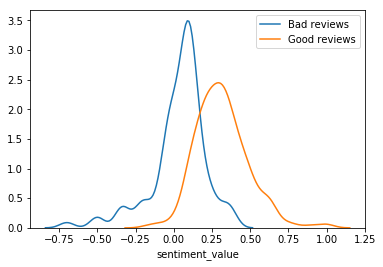

In [12]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [1, 5]:
    subset = data[data['Stars'] == x]
    
    # Draw the density plot
    if x == 5:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['sentiment_value'], hist = False, label = label)


<b>Split data into train & test

In [74]:
# define X and y
X = data.Reviews
y = data.Stars

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353,)
(152,)
(353,)
(152,)


In [75]:
data.shape

(505, 3)

<b>Creating user defined functions for clean the Reviews and pre-process the data

<b>1)Abbrevations and Words correction

In [76]:
def clean_Rev(Reviews):
    Reviews = Reviews.lower()
    Reviews = Reviews.strip()
    #Reviews = [word.strip(string.punctuation) for word in Reviews.split(" ")]
    Reviews = re.sub(r' +', ' ', Reviews)
    Reviews = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", Reviews)
    return(Reviews)

In [80]:
X_train = X_train.apply(lambda x: clean_Rev(x))
X_test = X_test.apply(lambda x: clean_Rev(x))

In [81]:
X_train[:5]

52     thanks to reliance capital for helping us get ...
229    it all started when bob g ran a credit check w...
246    very professional yet personable quick to help...
164    comments\tto begin my wife and i were at the p...
328    we are grateful that we came across adan muñoz...
Name: Reviews, dtype: object

<b>2)Tokenization

In [83]:
def tokenization(text):
    text = word_tokenize(text)
    return(text)
tok_X_train = X_train.apply(lambda x: tokenization(x))
tok_X_test = X_test.apply(lambda x: tokenization(x))

In [19]:
tok_X_train[:5]

52     [thanks, to, reliance, capital, for, helping, ...
229    [it, all, started, when, bob, g, ran, a, credi...
246    [very, professional, yet, personable, quick, t...
164    [comments, to, begin, my, wife, and, i, were, ...
328    [we, are, grateful, that, we, came, across, ad...
Name: Reviews, dtype: object

<b>3)Stop word Removal

In [20]:
stop = set(nltk.corpus.stopwords.words('english'))
def stop_word_removal(text):
    # Removing stop words
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    # correct spelling corrections
    text = text.apply(lambda x: str(TextBlob(x).correct()))
    return(text)
stop_X_train = stop_word_removal(X_train)
stop_X_test = stop_word_removal(X_test)

In [21]:
stop_X_train[:5]

52     thanks reliance capital helping us get thought...
229    started bob g ran credit check without knowled...
246    professional yet personal quick help questions...
164    comments begin wife point signing completion l...
328    grateful came across adam muco knowledgable ki...
Name: Reviews, dtype: object

<b>4)lemmatization

In [22]:
def lemmatization(text):
    #Lemmatization
    text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    #Removing nouns etc
    text = text.apply(lambda x: " ".join(word for word,pos in nltk.pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS']))
    return(text)
X_train = lemmatization(stop_X_train)
X_test = lemmatization(stop_X_test)

In [23]:
X_train[:10]

52     reliance helping u thought would difficult imp...
229    started ran without agreed told could close le...
246           professional yet personal highly recommend
164    begin signing satisfied originating applied le...
328    grateful came across knowledgable professional...
368           easy quick responsive would definitely use
104    slow took close nd financial borrowing said du...
179    first walking blandly bryant became guide tell...
333    really left distressful one going handle best ...
201    possible best possibly could listened responde...
Name: Reviews, dtype: object

<b>5)POS Tagging 

In [24]:
def pos_tagging(text):
    text = nltk.pos_tag(text)
    return(text)
pos_tag_X_train = tok_X_train.apply(lambda x: pos_tagging(x))
pos_tag_X_test = tok_X_test.apply(lambda x: pos_tagging(x))

In [25]:
pos_tag_X_train[:10]

52     [(thanks, NNS), (to, TO), (reliance, VB), (cap...
229    [(it, PRP), (all, DT), (started, VBD), (when, ...
246    [(very, RB), (professional, JJ), (yet, RB), (p...
164    [(comments, NNS), (to, TO), (begin, VB), (my, ...
328    [(we, PRP), (are, VBP), (grateful, JJ), (that,...
368    [(this, DT), (was, VBD), (such, JJ), (an, DT),...
104    [(slow, VB), (it, PRP), (took, VBD), (over, RP...
179    [(as, IN), (a, DT), (first, JJ), (time, NN), (...
333    [(it, PRP), (is, VBZ), (simple, JJ), (really, ...
201    [(aaron, NN), (did, VBD), (everything, NN), (h...
Name: Reviews, dtype: object

<b>Vectorization

In [26]:
#Vectorization for train dataset
count_vect = CountVectorizer(analyzer = 'word',token_pattern = r'\w{1,}',ngram_range= (1,1),min_df=5,encoding = 'latin-1',max_features=800)
X_train_count = count_vect.fit_transform(X_train)
X_train_count

<353x343 sparse matrix of type '<class 'numpy.int64'>'
	with 4787 stored elements in Compressed Sparse Row format>

<b>Examining the tokens and their counts

In [27]:
#store token names
X_train_tokens= count_vect.get_feature_names()
X_train_tokens

['able',
 'absolutely',
 'accept',
 'across',
 'adam',
 'additional',
 'agent',
 'ago',
 'agreed',
 'all',
 'almost',
 'along',
 'already',
 'also',
 'always',
 'amazing',
 'american',
 'another',
 'answer',
 'answered',
 'answering',
 'appreciated',
 'approved',
 'around',
 'ask',
 'asked',
 'asking',
 'aspect',
 'available',
 'away',
 'awesome',
 'back',
 'bad',
 'based',
 'beat',
 'beginning',
 'beneficial',
 'best',
 'better',
 'beyond',
 'big',
 'buy',
 'ca',
 'call',
 'called',
 'calling',
 'calm',
 'came',
 'can',
 'certainly',
 'challenging',
 'changed',
 'chose',
 'clear',
 'clearly',
 'close',
 'closed',
 'closing',
 'come',
 'comfortable',
 'complained',
 'complete',
 'completed',
 'completely',
 'complicated',
 'consider',
 'contracted',
 'could',
 'couldn',
 'current',
 'daily',
 'dealing',
 'dean',
 'decided',
 'definitely',
 'despite',
 'didn',
 'different',
 'distressful',
 'done',
 'due',
 'earlier',
 'easier',
 'easily',
 'easy',
 'efficient',
 'else',
 'email',
 'enc

In [28]:
# first 50 tokens
print(X_train_tokens[:50])

['able', 'absolutely', 'accept', 'across', 'adam', 'additional', 'agent', 'ago', 'agreed', 'all', 'almost', 'along', 'already', 'also', 'always', 'amazing', 'american', 'another', 'answer', 'answered', 'answering', 'appreciated', 'approved', 'around', 'ask', 'asked', 'asking', 'aspect', 'available', 'away', 'awesome', 'back', 'bad', 'based', 'beat', 'beginning', 'beneficial', 'best', 'better', 'beyond', 'big', 'buy', 'ca', 'call', 'called', 'calling', 'calm', 'came', 'can', 'certainly']


In [29]:
# last 50 tokens
print(X_train_tokens[-50:])

['sure', 'take', 'taken', 'talked', 'talking', 'telling', 'thank', 'thankful', 'that', 'thorough', 'thought', 'thousand', 'throughout', 'timely', 'together', 'told', 'took', 'top', 'tormented', 'total', 'tree', 'tried', 'true', 'truly', 'trusted', 'trying', 'two', 'u', 'understood', 'unlike', 'upon', 'use', 'used', 'using', 'usually', 'various', 'walked', 'want', 'wanted', 'well', 'went', 'whole', 'within', 'without', 'wonderful', 'worked', 'working', 'would', 'wyndham', 'yet']


In [30]:
# view X_train_dtm as a dense matrix
X_train_dtm = X_train_count.toarray()
X_train_dtm


array([[1, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
# count how many times EACH token appears across ALL Reviews in X_train_dtm
import numpy as np
X_train_counts = np.sum(X_train_dtm, axis=0)
X_train_counts

array([ 30,   9,   5,  10,  15,  13,   5,   5,   7,  20,  13,  13,   6,
        30,  52,  24,   8,  25,  18,  19,   9,   8,   5,  11,  18,  19,
         8,   6,  20,   7,   9,  28,  13,   7,   5,  25,  11,  60,  21,
        16,   5,  17,   7,  20,  29,   8,   8,  21,  16,  10,   5,   9,
        10,   8,   5,  43,  46,  31,  14,   7,   6,  11,  15,  10,  13,
         5,  10,  50,   5,   8,   5,  11,   8,  12,  22,  12,   8,  19,
        13,  29,   9,  13,   7,   5,  46,   7,  15,   8,   7,   7,  13,
        10,  29,  36,  22,  53,   7,  19,   8,  10,   9,   6,  14,   6,
        14,  24,   9,   8,  12,  15,   6,  15,  10,   9,  17,   9,  14,
         6,  58,   7,  33,   6,   7,  11,  11,  11,   5,  10,  23,   5,
         5,   6,   8,  11,  44,  17,  28,   5,  20,  30,  28,  36,  99,
        21,   5,   7,   7,   5,  23,  27,  23,  22,  12,   8,   6,  45,
         6,   6,   9,  12,   6,  13,   5,   9,   8,  10,   8,  15,   8,
         5,   5,   7,  11,   5,   6,   6,  19,  12,  29,   5,  3

In [32]:
X_train_counts.shape

(343,)

In [85]:
# create a DataFrame of tokens with their counts
dtm1=pd.DataFrame({'token':X_train_tokens, 'count':X_train_counts})
dtm1.sort_values(by=['count'],ascending = False,inplace = True)
print(dtm1.shape)
dtm1.head(10)

(343, 2)


,token,count
340,would,175
320,u,130
142,great,99
257,recommend,92
197,made,83
37,best,60
118,first,58
333,went,54
95,every,53
14,always,52


<b>Frequency distribution plot

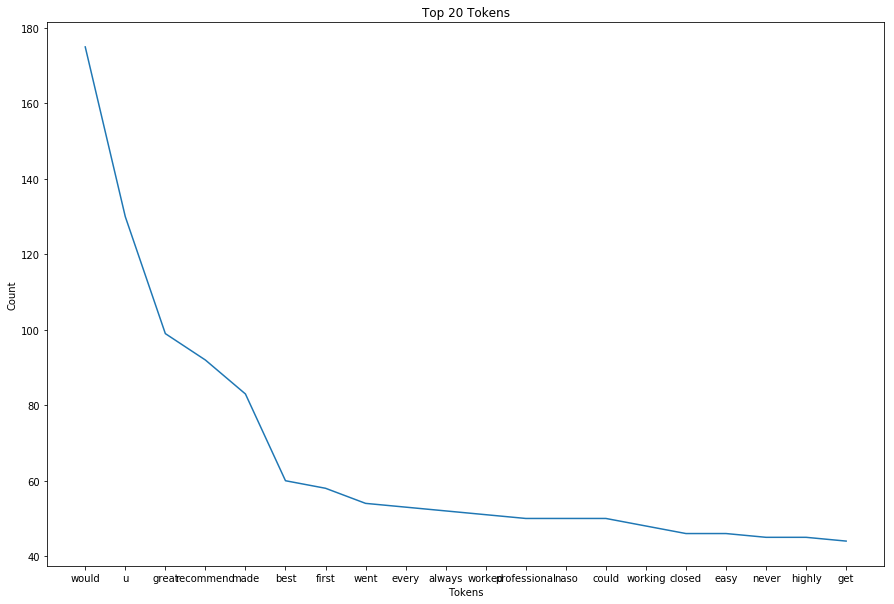

In [88]:
# Counting Words Appearing in a text(a frequency distribution)
top20 = dtm1[:20]
plt.figure(figsize=(15,10))
plt.plot('token','count',data=top20)
plt.xlabel('Tokens')
plt.ylabel('Count')
plt.title('Top 20 Tokens')
plt.show()

<b>Bank review data- Word Clouds

In [35]:
frequency_words_wo_stop= {}
for dat in data['Reviews']:
    tokens = nltk.wordpunct_tokenize(dat.lower())
    for token in tokens:
        if token.lower() not in stop:
            if token in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token]
                count = count + 1
                frequency_words_wo_stop[token] = count
            else:
                frequency_words_wo_stop[token] = 1

In [36]:
frequency_words_wo_stop

{'great': 139,
 'job': 25,
 ',': 1135,
 'wyndham': 16,
 'capital': 12,
 '!': 222,
 'person': 17,
 'professional': 70,
 'helped': 35,
 'us': 207,
 'move': 12,
 'refinance': 70,
 'process': 253,
 'smoothly': 15,
 '.': 1976,
 'thank': 50,
 'matthew': 3,
 'richardson': 1,
 'helpful': 56,
 'find': 19,
 'correct': 1,
 'product': 10,
 'mortgage': 147,
 'much': 38,
 'excellent': 30,
 'service': 99,
 'past': 13,
 'experience': 110,
 'would': 246,
 'without': 29,
 'question': 7,
 'use': 48,
 'needed': 29,
 '!!': 24,
 'went': 70,
 'beyond': 25,
 'extra': 19,
 'mile': 8,
 'right': 28,
 'wrong': 7,
 'encountered': 7,
 'servicer': 3,
 'dealing': 14,
 'previous': 13,
 'loan': 313,
 'pulled': 4,
 'together': 8,
 'found': 16,
 'viable': 3,
 'option': 8,
 'ultimately': 5,
 'saved': 7,
 'money': 22,
 'highly': 65,
 'recommend': 156,
 'brad': 7,
 'thomka': 3,
 'team': 113,
 'needs': 27,
 'sincerest': 2,
 'thanks': 61,
 'ed': 2,
 '&': 30,
 'lind': 1,
 'beginning': 32,
 'started': 17,
 'stressful': 24,
 'ti

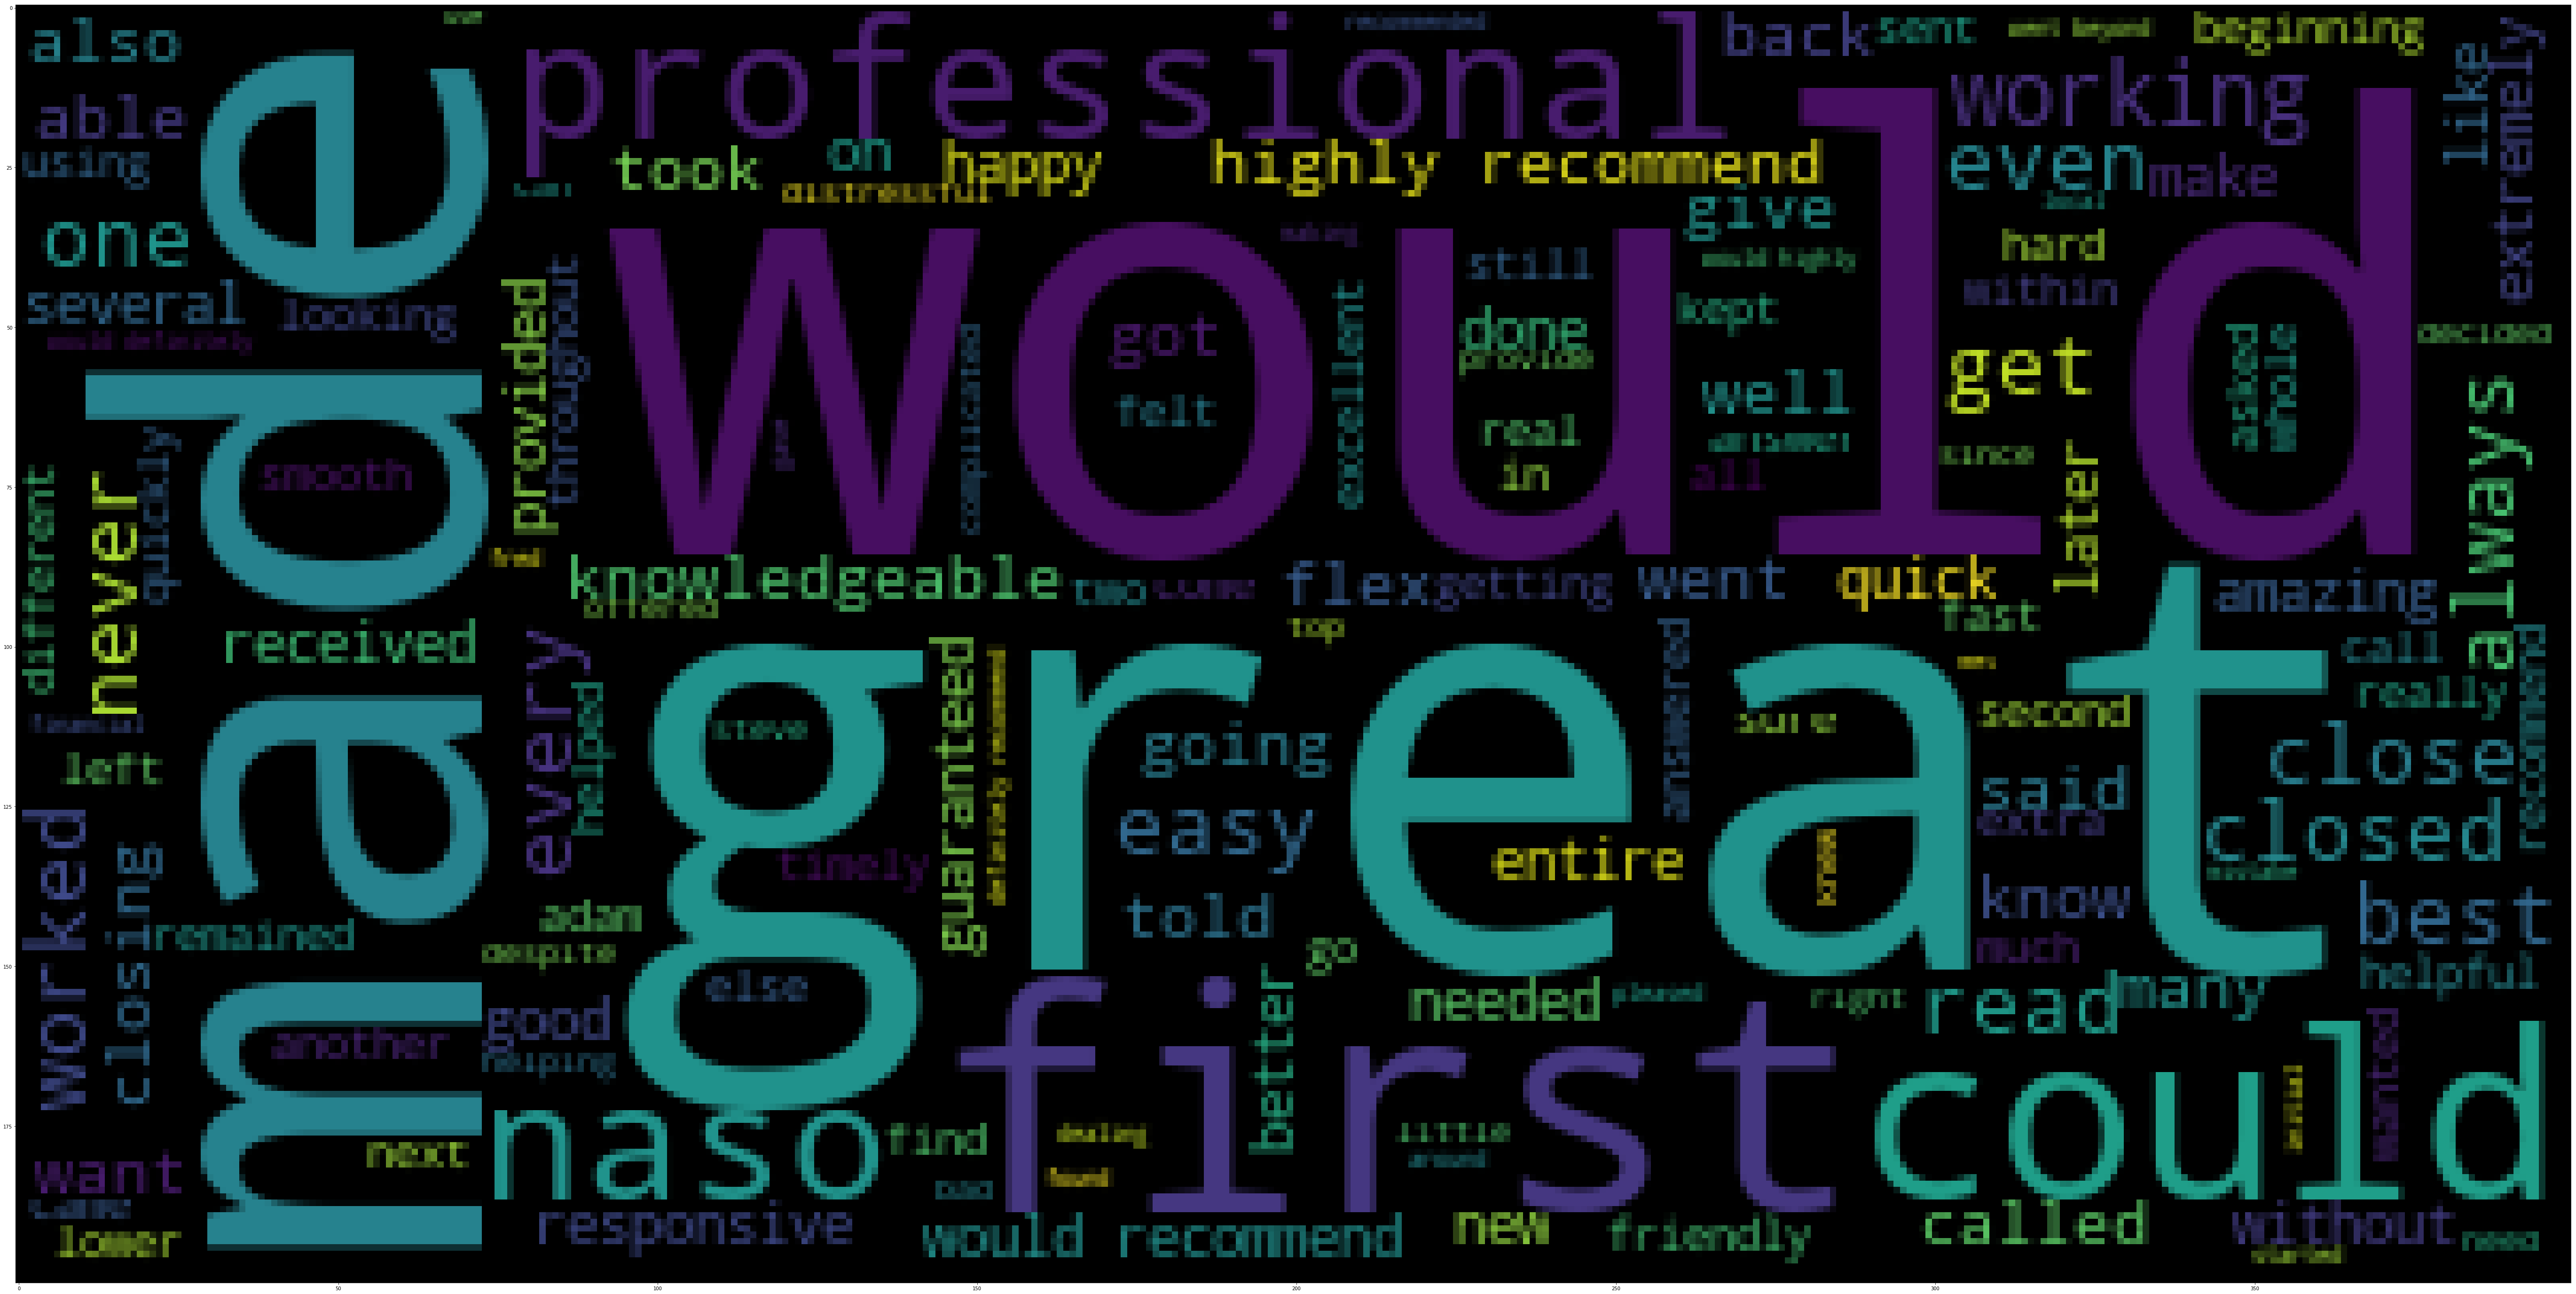

In [37]:
from wordcloud import WordCloud ,STOPWORDS
wordcloud = WordCloud(stopwords=[]).generate(' '.join(X_train.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

In [38]:
#Classify reviews to positive,negative and neutral
# we use textblob utility to calculate
def get_sentiment(text):
    analysis = TextBlob(text)    # create TextBlob objectof passed text
    if analysis.sentiment.polarity>0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'
text = X_train
sentiment = text.apply(lambda x: get_sentiment(x))
table = pd.concat([text,sentiment],axis = 1)
column_name = table.columns.values
column_name[1]= 'sentiment'
table.columns = column_name
table.head()

,Reviews,sentiment
52,reliance helping u thought would difficult imp...,positive
229,started ran without agreed told could close le...,positive
246,professional yet personal highly recommend,positive
164,begin signing satisfied originating applied le...,positive
328,grateful came across knowledgable professional...,positive


In [39]:
#Checking Reviews Percentage
positive = table[table.sentiment == 'positive']
print('Positive Reviews Percentage: {} %'.format(100*len(positive)/len(table.Reviews)))
negative = table[table.sentiment == 'negative']
print('negative Reviews Percentage: {} %'.format(100*len(negative)/len(table.Reviews)))
neutral = table[table.sentiment == 'neutral']
print('neutral Reviews Percentage: {} %'.format(100*len(table.Reviews)-len(negative)-len(positive)/len(table.Reviews)))

Positive Reviews Percentage: 88.10198300283287 %
negative Reviews Percentage: 8.215297450424929 %
neutral Reviews Percentage: 35270.11898016997 %


In [40]:
#Checking Top Positive and Negitive Reviews
print("TOP 5 Positive Reviews \n\n",positive.head()['Reviews'].tolist(),'\n')
print("TOP 5 Negative Reviews \n\n",negative.head()['Reviews'].tolist(),'\n')

TOP 5 Positive Reviews 

 ['reliance helping u thought would difficult impossible were past lately were working hard improving happy able u guide u throughout despite le cellar financial especially patrick g excellent read', 'started ran without agreed told could close le took still asking closing household good unpacked told could used fly id take doc rotary back also get send accept personal five later driving no already sent could send four purchased past', 'professional yet personal highly recommend', 'begin signing satisfied originating applied lending tree competitive several matched slightly beat naso convincing chose naso goodge competitive assuring professional timely suppurative truthful goodge bent whole delivered promised completely satisfied appreciative bud read', 'grateful came across knowledgable professional always remained calm helped u every well made appreciated secured used well closed earlier expected happy'] 

TOP 5 Negative Reviews 

 ['lender quite gave needed 

<b>Vectorization (count, tfidf) for both train & test

In [41]:
#Train
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             max_features=800)
xtrain_count = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(xtrain_count)

#Test
#count_vect = CountVectorizer()
xtest_count = count_vect.transform(X_test)

#tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.transform(xtest_count)
dtm2=pd.DataFrame(X_train_tfidf.toarray(), columns=count_vect.get_feature_names())

In [42]:
dtm2.head(10)

,able,absolutely,accept,across,adam,additional,agent,ago,agreed,all,...,went,whole,within,without,wonderful,worked,working,would,wyndham,yet
0,0.212473,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.184483,0.132700,0.0,0.000000
1,0.000000,0.0,0.190809,0.000000,0.0,0.0,0.0,0.0,0.179998,0.000000,...,0.000000,0.000000,0.0,0.141983,0.0,0.0,0.000000,0.000000,0.0,0.000000
2,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.614209
3,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.222896,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
4,0.000000,0.0,0.000000,0.249798,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
5,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.255460,0.0,0.000000
6,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.161943,0.000000,0.0,0.204084,0.0,0.0,0.000000,0.000000,0.0,0.000000
7,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.319385,0.0,0.000000
8,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.225642,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.114655,0.0,0.000000
9,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000


In [43]:
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern='\w{1,}', ngram_range=(1, 2), max_features=800)
tfidf_vect_ngram.fit(X)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

In [44]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern='\w{1,}', ngram_range=(1,2), max_features=800)
tfidf_vect_ngram_chars.fit(X)
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train) 
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test)

<b>Topic Modeling

In [45]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=50)
X_topics = lda_model.fit_transform(X_train_tfidf)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

topic_summaries

['quick real great good responsive always know also knowledgeable easy',
 'guaranteed wonderful absolutely challenging professionally rich away known top least',
 'never fred always available extra new much recommend would beyond',
 'professional tormented higher explain entire efficient dealing kept experienced worked',
 'helping throughout friendly followed able thorough quick really efficient unlike',
 'all super best minor overall can financed worked explained thorough',
 'timely need able bad friendly provided appreciated quickly clearly monthly',
 'minor available knowledgeable recommend quickly necessary truly professional answer followed',
 'would u every made recommend get always went even make',
 'honest beginning u steve knew total asked working said good',
 'best could great possible previous u responsive professional got despite',
 'on flex made recommend easy working next along great highly',
 'helpful chose explaining pleased friendly naso quickly good bad felt',
 'answe

<b>Creating a function for train models

In [46]:
def train_model(classifier,feature_vector_train,label,feature_vetor_valid,valid_y,is_neutral_net=False):
    classifier.fit(feature_vector_train,label) #fit training dataset on classifier
    predictions = classifier.predict(feature_vetor_valid) #Predict Labels on validation dataset
    
    if is_neutral_net:
        predictions = predictions.argmax(axis=-1)
    return metrics.accuracy_score(predictions,valid_y)

<b>Naive Bayes

In [47]:
# Naive Bayes on count vector tf-idf
accuracy_L1 = train_model(naive_bayes.MultinomialNB(),X_train_tfidf,y_train,X_test_tfidf,y_test)
print('NB for L1,count vectors: ',accuracy_L1)
# Naive Bayes on Word Level tf-idf
accuracy_L1 = train_model(naive_bayes.MultinomialNB(),xtrain_count,y_train,xtest_count,y_test)
print('NB for L1,Wordlevel vectors: ',accuracy_L1)
# Naive Bayes on Ngram Level tf-idf
accuracy_L1 = train_model(naive_bayes.MultinomialNB(),xtrain_tfidf_ngram,y_train,xtest_tfidf_ngram,y_test)
print('NB for L1,N-Gram vectors: ',accuracy_L1)
# Naive Bayes on Character Level tf-idf
accuracy_L1 = train_model(naive_bayes.MultinomialNB(),xtrain_tfidf_ngram_chars,y_train,xtest_tfidf_ngram_chars,y_test)
print('NB for L1,charlevel vectors: ',accuracy_L1)

NB for L1,count vectors:  0.8618421052631579
NB for L1,Wordlevel vectors:  0.9407894736842105
NB for L1,N-Gram vectors:  0.7960526315789473
NB for L1,charlevel vectors:  0.7960526315789473


In [48]:
#Linear SVC
# Linear SVC on Count Vectors and TF-IDF
from sklearn.svm import LinearSVC
accuracy_L1 = train_model(svm.LinearSVC(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("SVC  for L1, Count Vectors: ", accuracy_L1)

# Linear SVC on Word Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_count, y_train, xtest_count, y_test)
print("SVC  for L1, WordLevel TF-IDF: ", accuracy_L1)

# Linear SVC on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("SVC  for L1, N-Gram Vectors: ", accuracy_L1)

# Linear SVC on Character Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("SVC for L1, CharLevel Vectors: ", accuracy_L1)

SVC  for L1, Count Vectors:  0.9078947368421053
SVC  for L1, WordLevel TF-IDF:  0.9144736842105263
SVC  for L1, N-Gram Vectors:  0.9210526315789473
SVC for L1, CharLevel Vectors:  0.9144736842105263


<b>Predicting star rating using reviews

In [49]:
from collections import Counter
texts = [review for review in X_train]
stars = [review for review in y_train]

# Balancing the data
def balance_classes(xs,ys):
    """Undersample xs,ys to blalance classes"""
    freqs= Counter(ys)
    max_allowable = freqs.most_common()[-1][1]
    num_added = {clss:0 for clss in freqs.keys()}
    new_ys = []
    new_xs = []
    for i,y in enumerate(ys):
        if(num_added[y]<max_allowable):
            new_ys.append(y)
            new_xs.append(xs[i])
            num_added[y] +=1
    return(new_xs,new_ys)

In [50]:
print(Counter(stars))
balanced_x,balanced_y = balance_classes(texts,stars)
print(Counter(balanced_y))

Counter({5: 289, 1: 64})
Counter({5: 64, 1: 64})


In [51]:
from sklearn.svm import LinearSVC
vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectors = vectorizer.fit_transform(balanced_x)

X_train,X_test,y_train,y_test = train_test_split(vectors,balanced_y,test_size = 0.33,random_state = 123)
classifier = LinearSVC() 
classifier.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

<b> Top Possitive & Top Negative words

In [100]:
feature_to_coef = {
    word: coef for word, coef in zip(
        vectorizer.get_feature_names(), classifier.coef_[0]
    )
}
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print (best_positive)

    
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:5]:
    print (best_negative)


('great', 0.8881973572577123)
('responsive', 0.7183976006906647)
('on', 0.5895147309592367)
('helped', 0.5561077775492432)
('always', 0.5047585855092107)
('bad', -0.7108077482883131)
('followed', -0.6980195094044238)
('would', -0.5989697226926699)
('said', -0.5309779105289696)
('told', -0.5185633763709169)


In [52]:
#predicting train data
train_pred= classifier.predict(X_train)
print(list(train_pred[:10]))vectorizer
print(y_train[:10])

[5, 1, 1, 1, 1, 1, 5, 5, 5, 5]
[5, 1, 1, 1, 1, 1, 5, 5, 5, 5]


In [56]:
#predicting test data
test_preds = classifier.predict(X_test)
print(list(test_preds[:10]))
print(y_test[:10])

[5, 1, 1, 5, 5, 5, 5, 1, 1, 5]
[5, 1, 1, 1, 5, 5, 5, 1, 1, 5]


In [55]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_preds))

0.9302325581395349


In [60]:
# confusion matrix
print(metrics.confusion_matrix(y_test, test_preds))

[[17  1]
 [ 2 23]]
